# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [14]:
# import libraries here
import sys
sys.path.append("../")
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [5]:
# your answer here
temp = pd.read_csv('Temp_States.csv')


#### Print `temp`

In [6]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [7]:
# your answer here
#Strings, strings categories and floats

#### Select the rows where state is New York

In [13]:
# your answer here
ny = temp.get(temp["State"]== 'New York')
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [147]:
# your answer here
ny["Temperature"].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [18]:
# your answer here
cities = []
states = []

for index, row in temp.iterrows():
    if row["Temperature"] > 15:
        cities.append (row["City"])
        states.append (row["State"])
print (set(cities))
print (set(states))
        

{'NYC', 'Newark', 'Hartford', 'Treton'}
{'Connecticut', 'New York', 'New Jersey'}


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [19]:
# your answer here
print (set(cities))

{'NYC', 'Newark', 'Hartford', 'Treton'}


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [20]:
# your answer here
cities_15_20 = []
for index, row in temp.iterrows():
    if row["Temperature"] > 15 and row["Temperature"]<20:
        cities_15_20.append (row["City"])
print (set(cities_15_20))

{'NYC', 'Hartford'}


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [38]:
# your answer here
def mean_stdv (my_state):
    state_temp = []
    for index, row in temp.iterrows():
        if row["State"] == my_state:
            state_temp.append(row ["Temperature"])
    my_mean= np.round(np.mean(state_temp))
    my_stdv= np.round(np.std(state_temp), 2)
    return print(f"{my_state} mean:{my_mean}\n {my_state} stdv:{my_stdv}\n")

In [39]:
mean_stdv("Connecticut")
mean_stdv('New York')
mean_stdv('New Jersey')

Connecticut mean:16.0
 Connecticut stdv:1.39

New York mean:11.0
 New York stdv:6.64

New Jersey mean:21.0
 New Jersey stdv:1.11



# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [68]:
# your answer here
employee = pd.read_csv('employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [29]:
# your answer here
#names:string
#departments, education,gende,title: categories in strings
#years: int continuous variable 
#salary: int variable

In [81]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

There are two groups of years, one between one anda four and another between 6,5 and 8. 
The most common is two years or 7,5 years


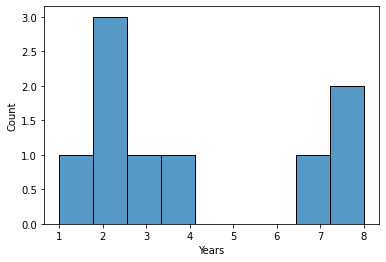

In [40]:
# your answer here
sns.histplot(employee.Years, bins=9)
print(f"There are two groups of years, one between one anda four and another between 6,5 and 8. \nThe most common is two years or 7,5 years")

There are three groups os salaries.
The first one is between 30 and 39. 
The second one between 53,5 and 62. In this group is more common to hace a salary between 52,5 and 56. 
The third group is between 65 and 70, and it is where we hace less people


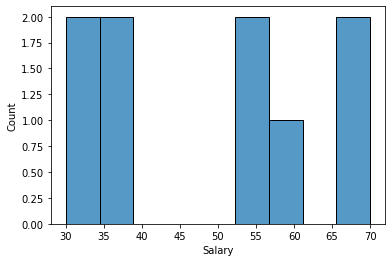

In [42]:
sns.histplot(employee.Salary, bins=9)
print(f"There are three groups os salaries.\nThe first one is between 30 and 39. \nThe second one between 53,5 and 62. In this group is more common to hace a salary between 52,5 and 56. \nThe third group is between 65 and 70, and it is where we hace less people")

#### What's the average salary in this company?

In [45]:
# your answer here
round(np.average(employee["Salary"]))

       

49

#### What's the highest salary?

In [46]:
# your answer here
np.max(employee["Salary"])

70

#### What's the lowest salary?

In [47]:
# your answer here
np.min(employee["Salary"])

30

#### Who are the employees with the lowest salary?

In [49]:
# your answer here
for index,row in employee.iterrows():
    if row["Salary"] == np.min(employee["Salary"]):
        print (row["Name"])

Maria
David


#### Could you give all the information about an employee called David?

In [50]:
# your answer here
print (employee.get(employee["Name"]== 'David'))

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### Could you give only David's salary?

In [52]:
# your answer here

for index,row in employee.iterrows():
    if row["Name"]== 'David':
        print (row["Salary"])

30


#### Print all the rows where job title is associate

In [56]:
# your answer here
for index,row in employee.iterrows():
    if row["Title"]== 'associate':
        print (row,"\n-----------------------")

Name             Samuel
Department        Sales
Education        Master
Gender                M
Title         associate
Years                 3
Salary               55
Name: 4, dtype: object 
-----------------------
Name                Eva
Department        Sales
Education      Bachelor
Gender                F
Title         associate
Years                 2
Salary               55
Name: 5, dtype: object 
-----------------------
Name              Pedro
Department           IT
Education           Phd
Gender                M
Title         associate
Years                 7
Salary               60
Name: 7, dtype: object 
-----------------------


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [57]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [59]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [61]:
# your answer here
for index,row in employee.iterrows():
    if row["Title"]== 'associate' and row["Salary"] > 55:
        print (row["Name"])

Pedro


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [83]:
round(employee.groupby('Years')['Salary'].mean())

Years
1    35.0
2    38.0
3    55.0
4    35.0
7    60.0
8    70.0
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [84]:
# your answer here
round(employee.groupby('Title')['Salary'].mean())

Title
VP           70.0
analyst      32.0
associate    57.0
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

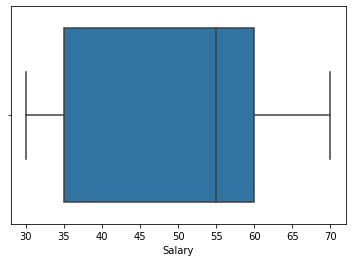

In [88]:
# draw boxplot here

sns.boxplot(x="Salary", data=employee)
plt.show()


In [91]:
# print first quartile here
employee.Salary.quantile(0.25)

35.0

In [90]:
# print third quartile here
employee.Salary.quantile(0.75)

60.0

#### Is the mean salary per gender different?

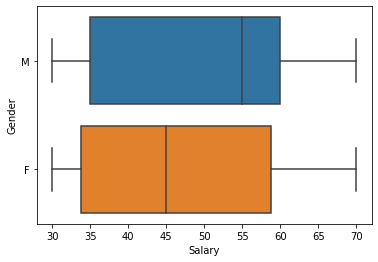

Yes, the median seems quite different


In [93]:
# your answer here
sns.boxplot(x="Salary", y="Gender",data=employee)
plt.show()
print(f"Yes, the median seems quite different")

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [100]:
# your answer here
print(
    "The salary mean per department is\n",
    round(employee.groupby('Department')['Salary'].mean()),
    "\n----------------------------------\n",
    "The salary max per department is\n",
    round(employee.groupby('Department')['Salary'].max()),
    "\n----------------------------------\n",
    "The salary min per department is\n",
    round(employee.groupby('Department')['Salary'].min()),
    "\n----------------------------------\n",
    "///////////////////////////////////"
    "\n----------------------------------\n",
    "The years mean per department is\n",
    round(employee.groupby('Department')['Years'].mean()),
    "\n----------------------------------\n",
    "The years max per department is\n",
    round(employee.groupby('Department')['Years'].max()),
    "\n----------------------------------\n",
    "The years min per department is\n",
    round(employee.groupby('Department')['Years'].min())
)

The salary mean per department is
 Department
HR       45.0
IT       49.0
Sales    55.0
Name: Salary, dtype: float64 
----------------------------------
 The salary max per department is
 Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64 
----------------------------------
 The salary min per department is
 Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64 
----------------------------------
 ///////////////////////////////////
----------------------------------
 The years mean per department is
 Department
HR       5.0
IT       4.0
Sales    2.0
Name: Years, dtype: float64 
----------------------------------
 The years max per department is
 Department
HR       8
IT       8
Sales    3
Name: Years, dtype: int64 
----------------------------------
 The years min per department is
 Department
HR       2
IT       1
Sales    2
Name: Years, dtype: int64


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [102]:
# your answer here
orders = pd.read_csv('Orders.csv')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [103]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
# your answer here

####  What is the average Purchase Price?

In [107]:
# your answer here
round(orders["amount_spent"].mean(),2)

22.39

#### What were the highest and lowest purchase prices? 

In [108]:
# your answer here
round(orders["amount_spent"].max())

168470

In [109]:
# your answer here
round(orders["amount_spent"].min())

0

#### Select all the customers we have in Spain

In [111]:
# your answer here
spain_cust = orders.get(orders["Country"]== 'Spain')
spain_cust.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [114]:
# your answer here
orders.value_counts(orders["Country"]=="Spain")

Country
False    395439
True       2485
dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [129]:
# your answer here
customers = (orders.groupby('CustomerID')["Quantity"].sum())
print(customers)

CustomerID
12346    74215
12347     2458
12348     2341
12349      631
12350      197
         ...  
18280       45
18281       54
18282      103
18283     1397
18287     1586
Name: Quantity, Length: 4339, dtype: int64


In [130]:
customers.get(customers>50)

CustomerID
12346    74215
12347     2458
12348     2341
12349      631
12350      197
         ...  
18278       66
18281       54
18282      103
18283     1397
18287     1586
Name: Quantity, Length: 4091, dtype: int64

#### Select orders from Spain that are above 50 items

In [132]:
# your answer here
spain_50= spain_cust.get(spain_cust["Quantity"]>50)
spain_50.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [133]:
# your answer here
free = orders.get(orders["amount_spent"]==0)
free.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [172]:
# your answer here

lunch_bag = orders[orders.Description.str.contains("lunch bag")]

lunch_bag.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [174]:
# your answer here
lunch_bag_2011 = lunch_bag.get(lunch_bag["year"]==2011)
lunch_bag_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

In [161]:
# your answer here
spain_dt = orders.get(orders["Country"] == "Spain")
spain_dt.head()
print("2485 rows")

2485 rows


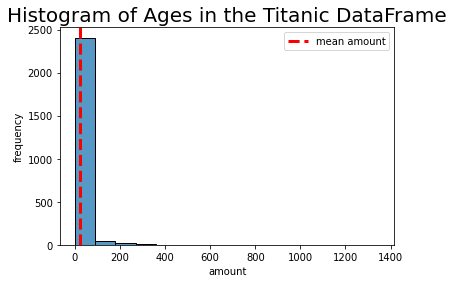

In [171]:
fig, ax = plt.subplots()

sns.histplot(spain_dt.amount_spent, bins=15)

# plot the mean
plt.axvline(
    spain_dt.amount_spent.mean(),
    c="red",
    linewidth= 3,
    linestyle='--',
    label='mean amount'
)

plt.title('Histogram of Ages in the Titanic DataFrame', size=20)
plt.xlabel('amount')
plt.ylabel('frequency')
plt.legend()
plt.show()

#### Select all orders made in the month of August

In [142]:
# your answer here
august = orders.get(orders["month"] == 8)
august.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [145]:
# your answer here
august.value_counts(august["Country"])

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
dtype: int64

#### What's the  average amount of money spent by country

In [149]:
# your answer here
round(orders.groupby('Country')['amount_spent'].mean())

Country
Australia               117.0
Austria                  26.0
Bahrain                  32.0
Belgium                  20.0
Brazil                   36.0
Canada                   24.0
Channel Islands          27.0
Cyprus                   22.0
Czech Republic           33.0
Denmark                  50.0
EIRE                     37.0
European Community       22.0
Finland                  33.0
France                   25.0
Germany                  25.0
Greece                   33.0
Iceland                  24.0
Israel                   29.0
Italy                    23.0
Japan                   117.0
Lebanon                  38.0
Lithuania                47.0
Malta                    24.0
Netherlands             121.0
Norway                   34.0
Poland                   22.0
Portugal                 23.0
RSA                      17.0
Saudi Arabia             16.0
Singapore                96.0
Spain                    25.0
Sweden                   85.0
Switzerland              31.0
US

#### What's the most expensive item?

In [150]:
# your answer here
np.max(orders["UnitPrice"])

8142.75

#### What was the average amount spent per year ?

In [151]:
# your answer here
round(orders.groupby('year')['amount_spent'].mean())

year
2010    22.0
2011    22.0
Name: amount_spent, dtype: float64